# Regression with a Flood Prediction Dataset

Overview
Welcome to the 2024 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting an approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

Your Goal: The goal of this competition is to predict the probability of a region flooding based on various factors.

@misc{playground-series-s4e5,
    author = {Walter Reade, Ashley Chow},
    title = {Regression with a Flood Prediction Dataset},
    publisher = {Kaggle},
    year = {2024},
    url = {https://kaggle.com/competitions/playground-series-s4e5}
}

Step 1: Data Loading
We'll load the dataset from the CSV file into a Pandas DataFrame.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Display the first few rows of the dataframe
print(df.head())
print(test_df.head())


   id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   ...  DrainageSystems  CoastalVulner

Step 2: Data Exploration
We'll check the basic information about the dataset to understand its structure and features.

In [6]:
# Check the shape of the dataframe
print("Shape of the dataframe:", df.shape)

# Check the column names and data types
print("Columns and data types:")
print(df.dtypes)

# Check for any missing values
print("Missing values:")
print(df.isnull().sum())

# Summary statistics
print("Summary statistics:")
print(df.describe())


Shape of the dataframe: (1117957, 22)
Columns and data types:
id                                   int64
MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   

Step 3: Exploratory Data Analysis (EDA)
We'll perform some visualizations to gain insights into the data and understand the relationships between different features.

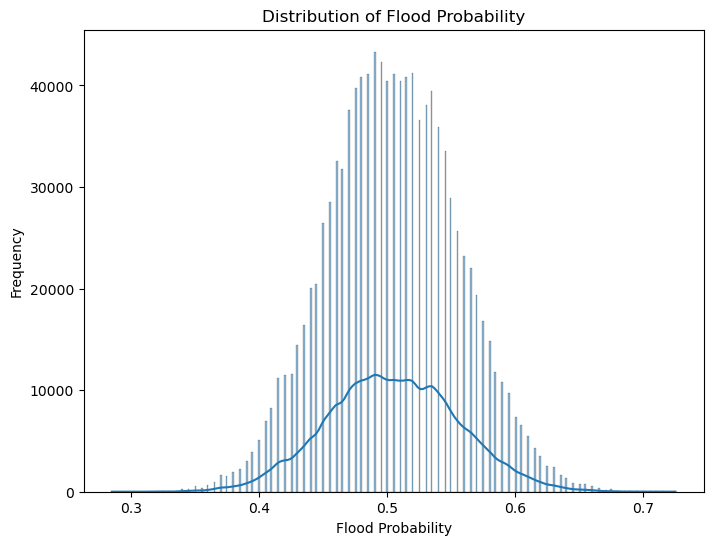

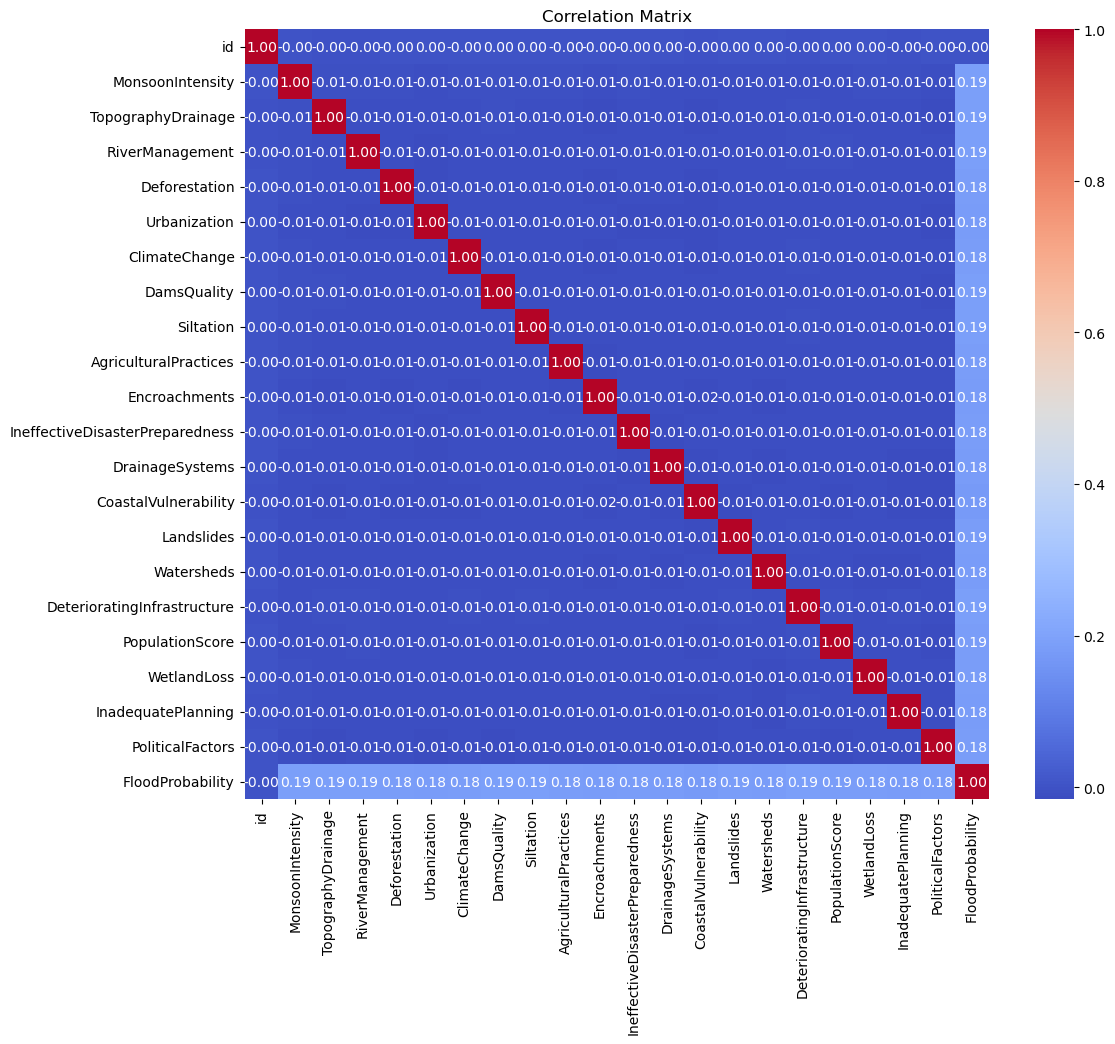

In [7]:

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['FloodProbability'], kde=True)
plt.title('Distribution of Flood Probability')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



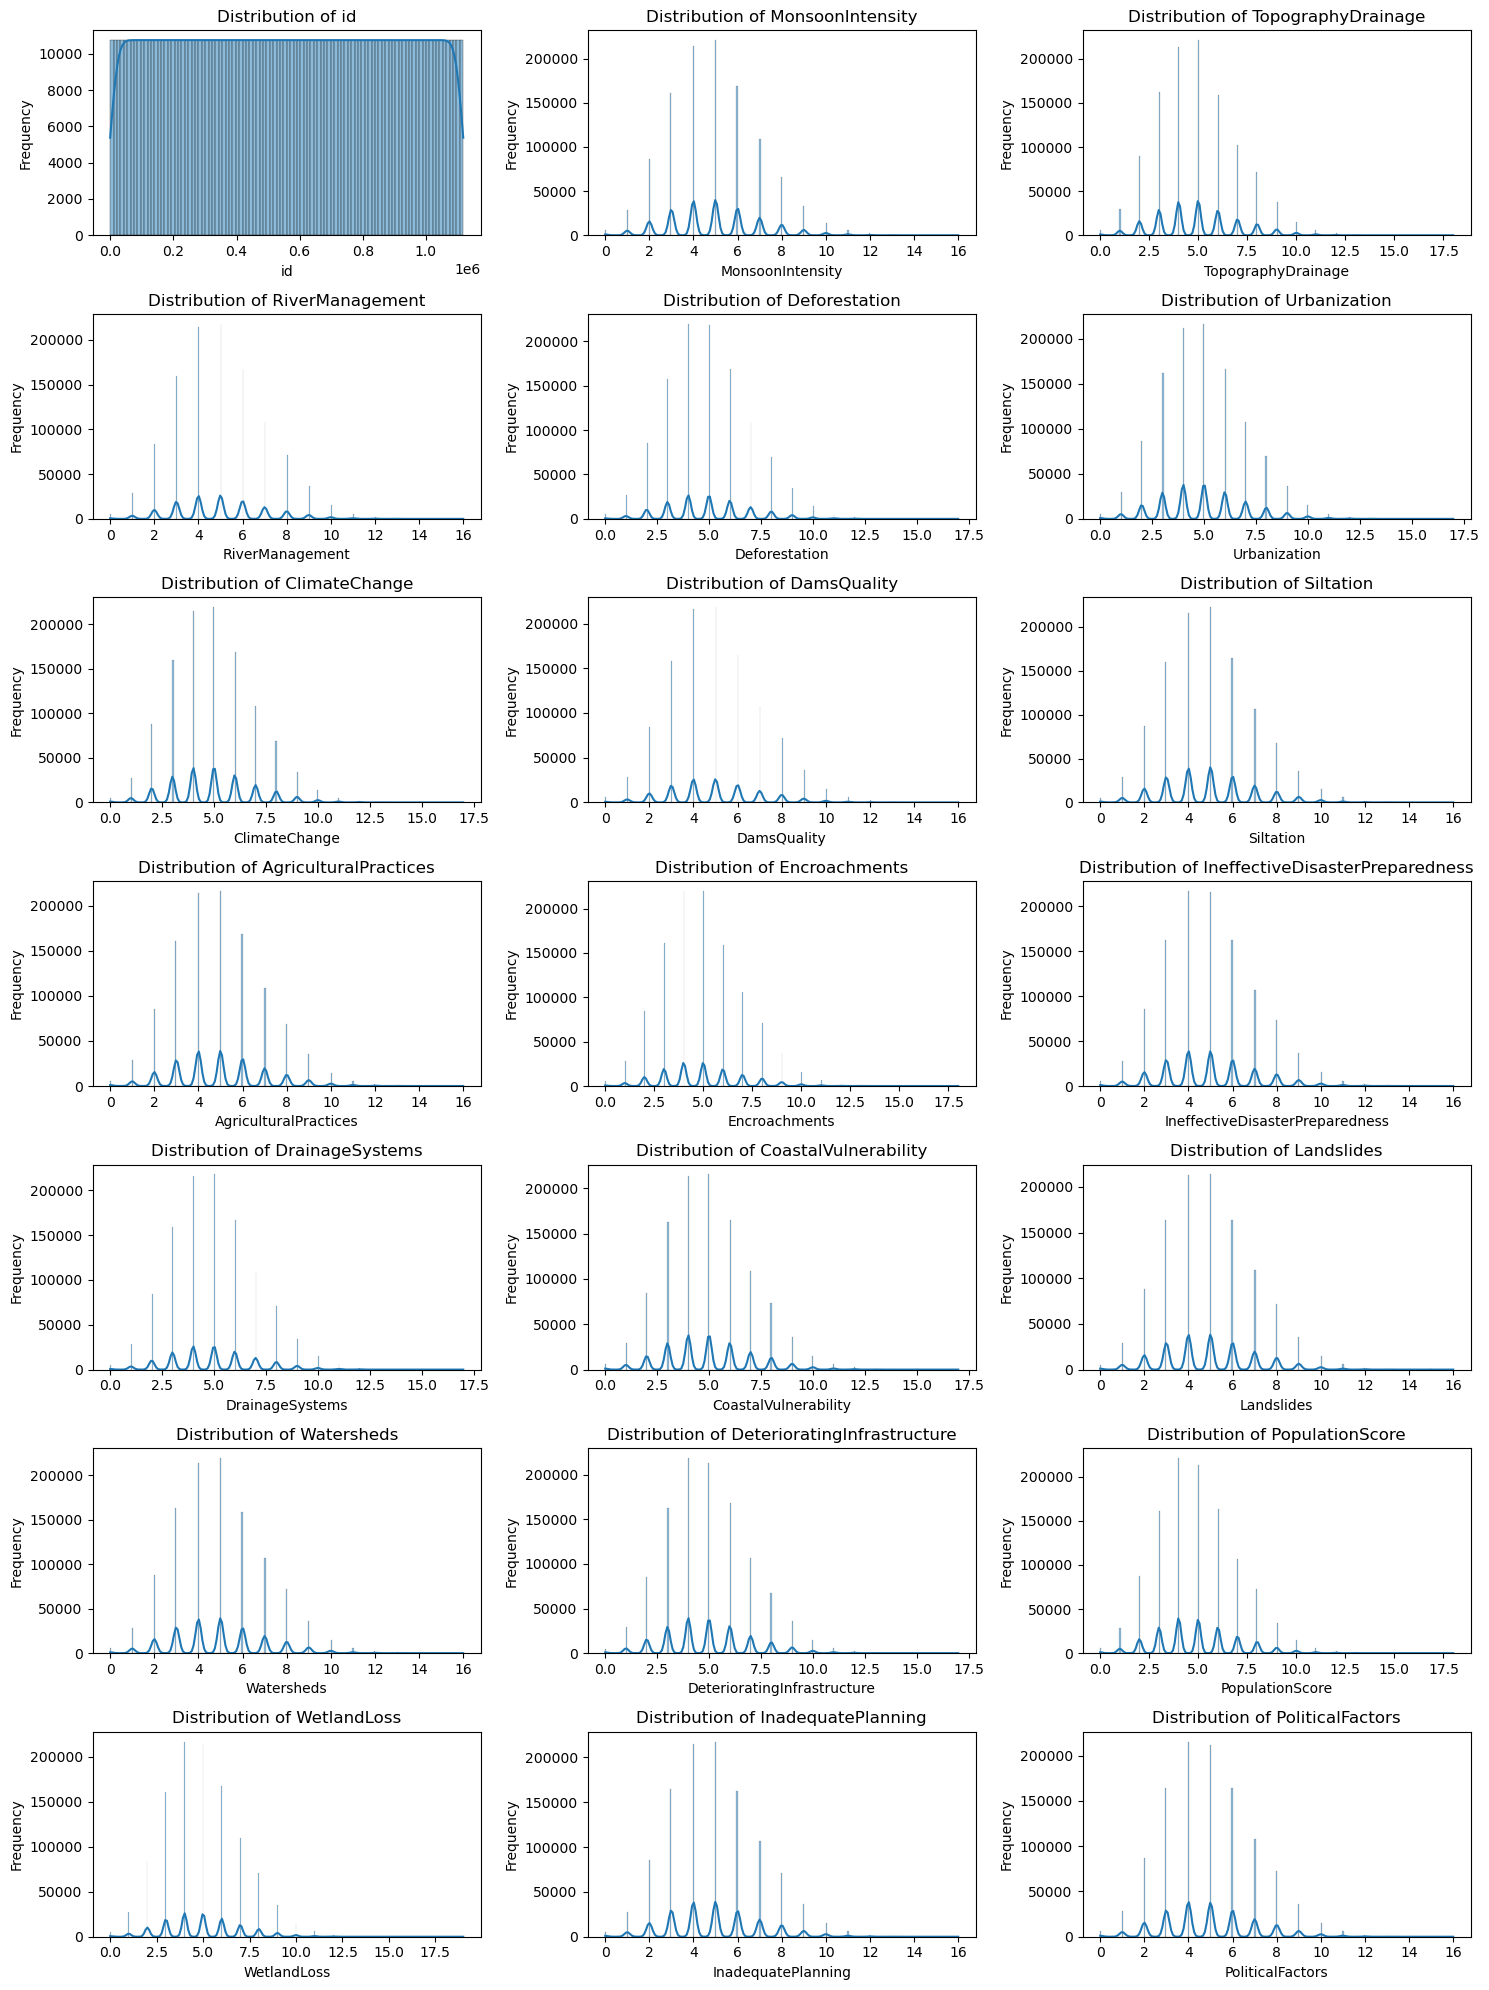

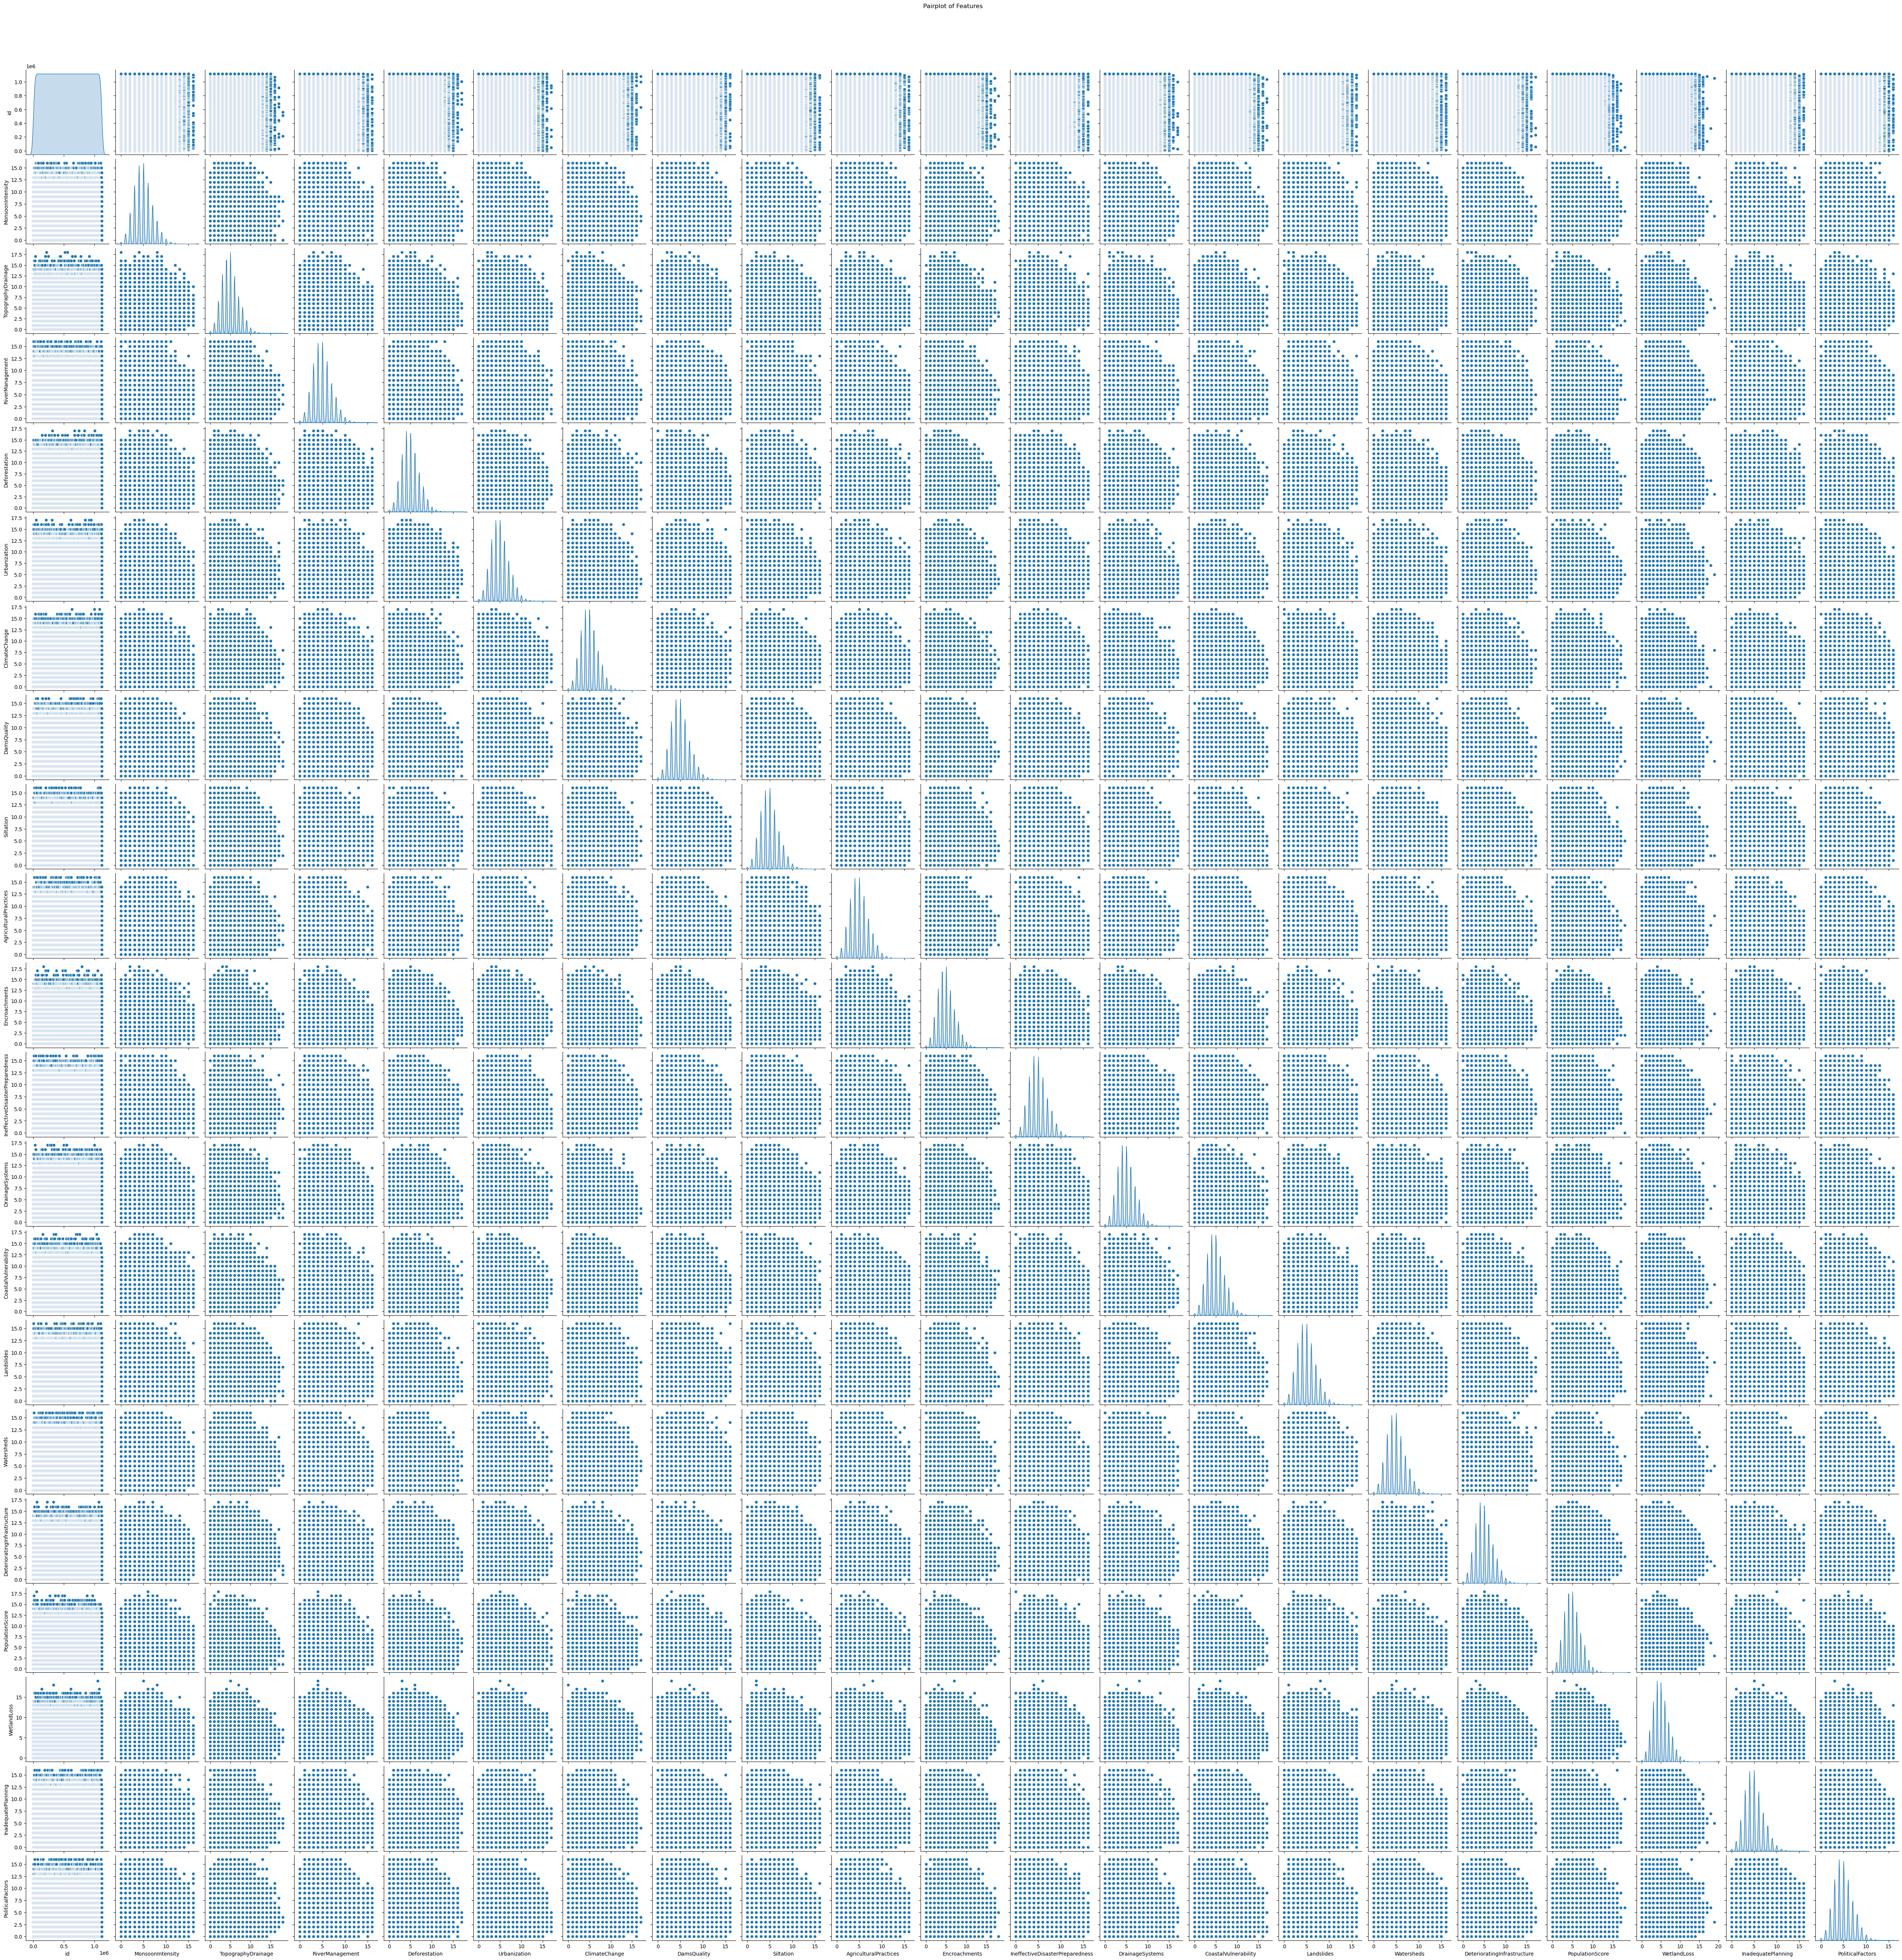

In [9]:
# Visualize the distribution of each feature
plt.figure(figsize=(15, 20))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(7, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between features
#sns.pairplot(df, vars=df.columns[:-1], diag_kind='kde')
#plt.suptitle('Pairplot of Features', y=1.02)
#plt.show()

Scatter Plot for Specific Features and Related Visualizations

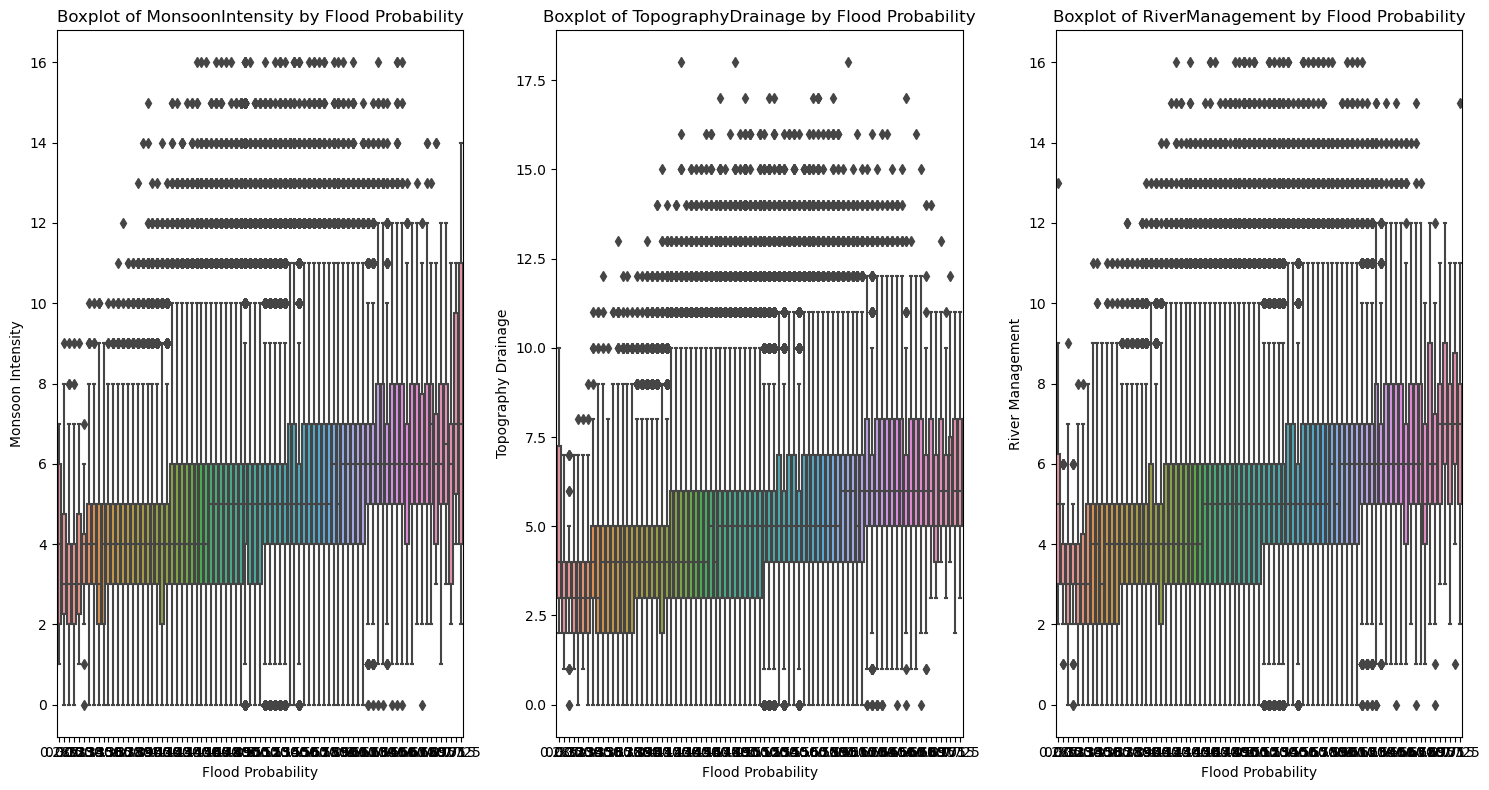

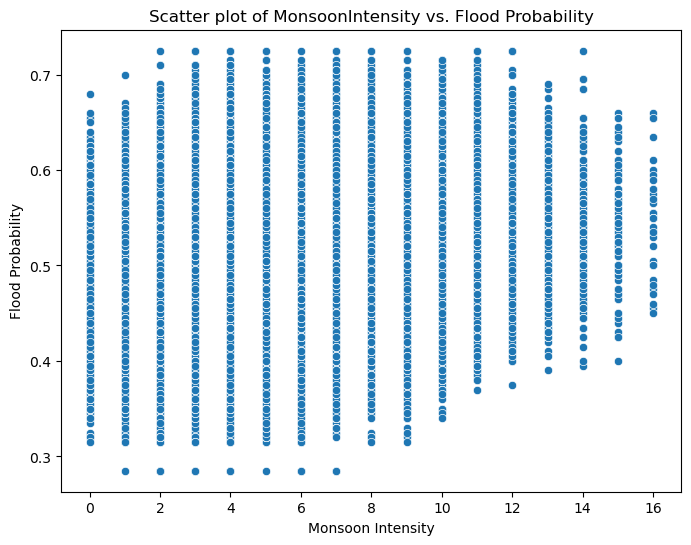

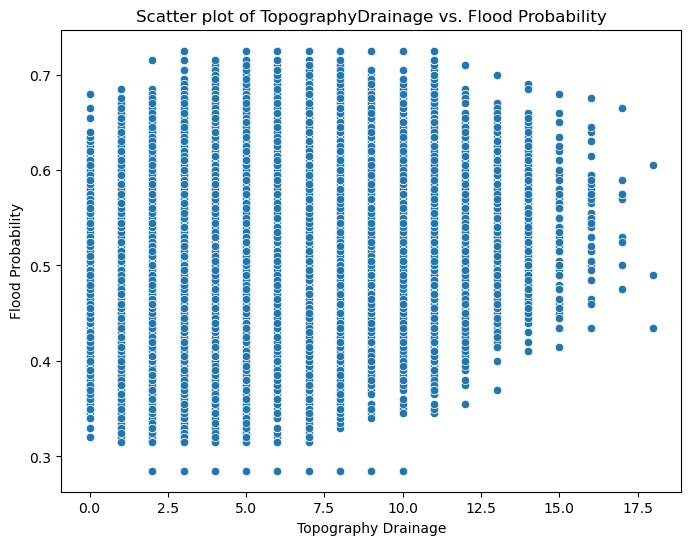

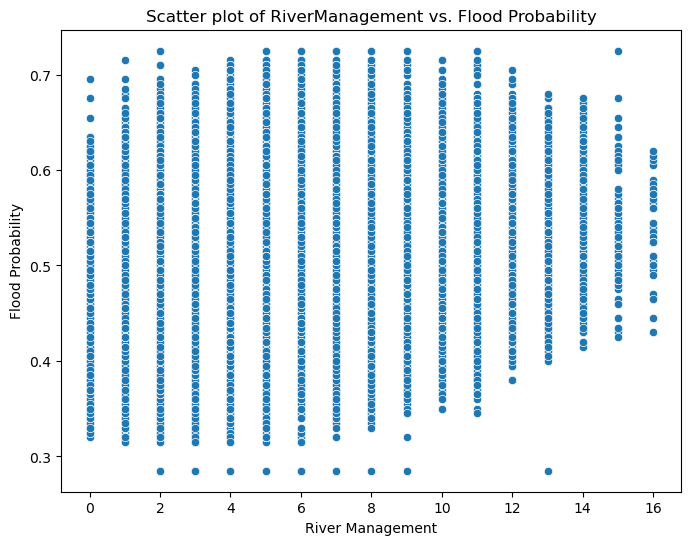

In [10]:

# Scatter plot to visualize the relationship between MonsoonIntensity and FloodProbability
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonsoonIntensity', y='FloodProbability', data=df)
plt.title('Scatter plot of MonsoonIntensity vs. Flood Probability')
plt.xlabel('Monsoon Intensity')
plt.ylabel('Flood Probability')
plt.show()

# Scatter plot to visualize the relationship between TopographyDrainage and FloodProbability
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TopographyDrainage', y='FloodProbability', data=df)
plt.title('Scatter plot of TopographyDrainage vs. Flood Probability')
plt.xlabel('Topography Drainage')
plt.ylabel('Flood Probability')
plt.show()

# Scatter plot to visualize the relationship between RiverManagement and FloodProbability
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RiverManagement', y='FloodProbability', data=df)
plt.title('Scatter plot of RiverManagement vs. Flood Probability')
plt.xlabel('River Management')
plt.ylabel('Flood Probability')
plt.show()



Step 4 - Appliying Data Engineering Steps if necessary and creating Model.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Separate the data
X = df.drop([ 'FloodProbability'], axis=1)
y = df['FloodProbability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Instantiate the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print('------------ACCURACY---------------')
print("R2 score:", r2)


------------ACCURACY---------------
R2 score: 0.8452629126718558


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Instantiate the model
dt_model = DecisionTreeRegressor(random_state=42)

# Perform cross-validation
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5, scoring='r2')

# Print cross-validated R2 scores
print("Cross-validated R2 scores for Decision Tree:")
print(cv_scores_dt)

# Calculate mean R2 score from cross-validation
mean_r2_dt = cv_scores_dt.mean()
print("Mean R2 score from cross-validation for Decision Tree:", mean_r2_dt)


Cross-validated R2 scores for Decision Tree:
[-0.01559219  0.04086102  0.05993065  0.05304265 -0.01726839]
Mean R2 score from cross-validation for Decision Tree: 0.024194746856915805


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf_model = RandomForestRegressor(random_state=42)

# Perform cross-validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Print cross-validated R2 scores
print("Cross-validated R2 scores for Random Forest:")
print(cv_scores_rf)

# Calculate mean R2 score from cross-validation
mean_r2_rf = cv_scores_rf.mean()
print("Mean R2 score from cross-validation for Random Forest:", mean_r2_rf)



Cross-validated R2 scores for Random Forest:
[0.63997578 0.64729681 0.65098209 0.64962777 0.64144466]
Mean R2 score from cross-validation for Random Forest: 0.645865421956049


In [31]:
# Assuming you already have test_df DataFrame loaded into your environment

# Predict 'FloodProbability' for the testing data
y_pred_test = model.predict(test_df)

# Create a DataFrame with 'id' and predicted 'FloodProbability'
submission_df = pd.DataFrame()
submission_df['id'] = test_df['id']  # Assuming 'id' column exists in test_df
submission_df['FloodProbability'] = y_pred_test

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)
